### Bret Young
#### DSC 640
#### Assignment 4.2
#### 25 October 2020

- scatter plot
- bubble plot
- density plot

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset
url = '~/Desktop/DSC 640/ex4-2/crimerates-by-state-2005.csv'
data = pd.read_csv(url, sep = ',')

In [3]:
data.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221


In [4]:
# Remove District of Columbia & United States
data_filter = data[(data['state'] != 'United States') & (data['state'] != 'District of Columbia')]

In [5]:
# loading required libraries
import scipy.stats as stats
import statsmodels.api as sm

# creating LOESS curve
lowess = sm.nonparametric.lowess
w = lowess(data_filter['burglary'], data_filter['murder'], frac = 0.5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


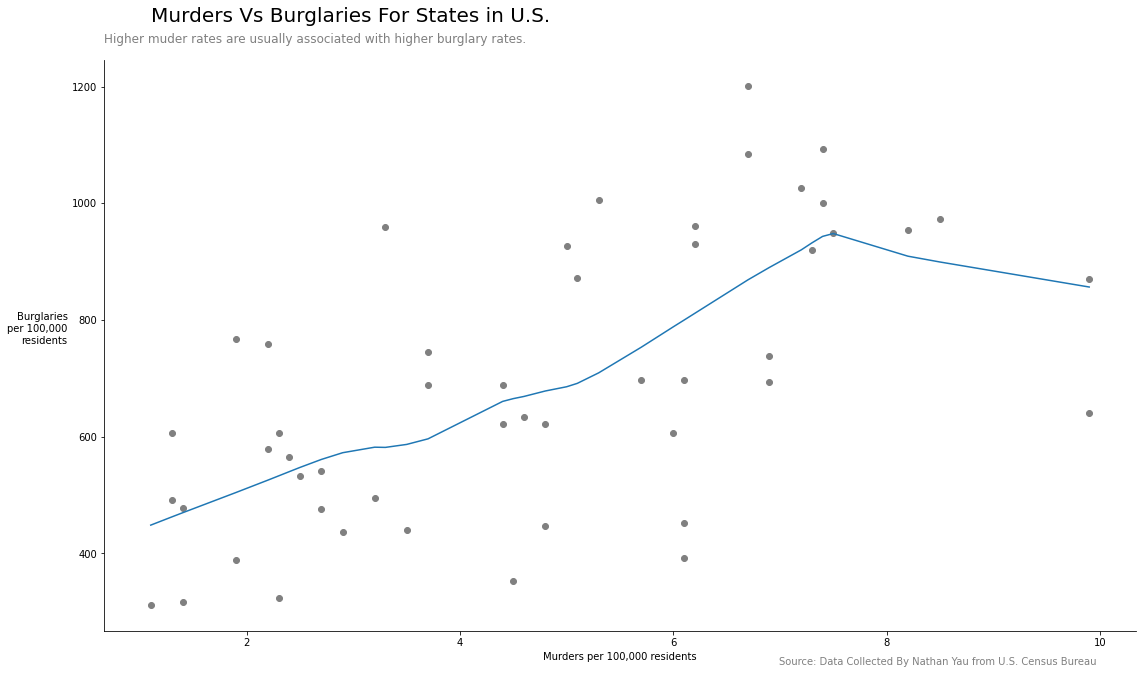

In [6]:
# Create axes and figure
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Set figure size
fig.set_size_inches(18.5, 10.5)

# Add plot to figure
ax1.scatter(data_filter['murder'], data_filter['burglary'], color = 'gray')
ax1.plot(w[:,0], w[:,1])


# Set titles, caption and axis labels
fig.suptitle("Murders Vs Burglaries For States in U.S.", x = 0.31, y = 0.95, fontsize=20)
fig.text(.87, .08, 'Source: Data Collected By Nathan Yau from U.S. Census Bureau', ha = 'right', color = 'gray')
ax1.set_title("Higher muder rates are usually associated with higher burglary rates.", y = 1.02, loc='left', color = 'gray')
ax1.set_xlabel("Murders per 100,000 residents")
ax1.set_ylabel("Burglaries\nper 100,000\nresidents", rotation = 0, ha = 'right')

# Remove frame
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Show plot
plt.show

# save file
fig.savefig("python_scatter.png")

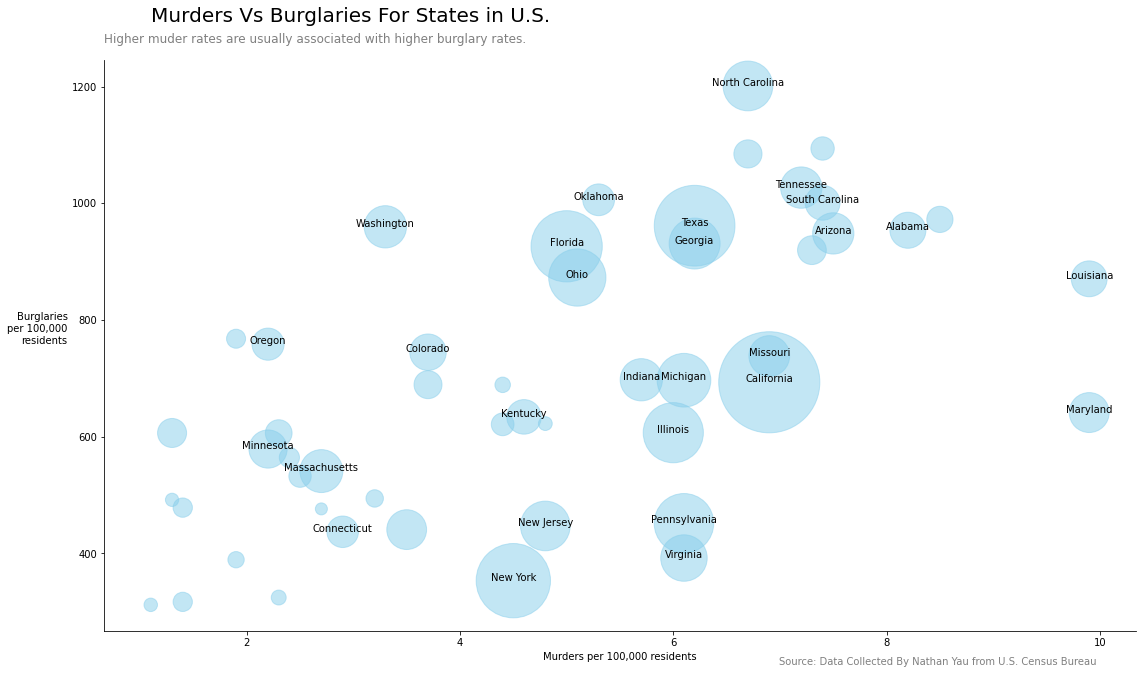

In [7]:
# Create axes and figure
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Set figure size
fig.set_size_inches(18.5, 10.5)

# Add plot to figure
ax1.scatter(data_filter['murder'], data_filter['burglary'], color = 'skyblue', s = data_filter['population']/3500, alpha = 0.5)
# add a label inside the bubbles
for line in range(0, data_filter.shape[0]):
    try:
        if data_filter['population'][line] >= 3000000:
            ax1.text(data_filter['murder'][line], data_filter['burglary'][line], data_filter['state'][line], horizontalalignment='center', size='medium', color='black')
        else:
            continue
    except KeyError:
        continue
        
# Set titles, caption and axis labels
fig.suptitle("Murders Vs Burglaries For States in U.S.", x = 0.31, y = 0.95, fontsize=20)
fig.text(.87, .08, 'Source: Data Collected By Nathan Yau from U.S. Census Bureau', ha = 'right', color = 'gray')
ax1.set_title("Higher muder rates are usually associated with higher burglary rates.", y = 1.02, loc='left', color = 'gray')
ax1.set_xlabel("Murders per 100,000 residents")
ax1.set_ylabel("Burglaries\nper 100,000\nresidents", rotation = 0, ha = 'right')

# Remove frame
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Show plot
plt.show

# save file
fig.savefig("python_bubble.png")

In [8]:
# Load dataset
url_2 = '~/Desktop/DSC 640/ex4-2/birth-rate.csv'
data_2 = pd.read_csv(url_2, sep = ',')

In [9]:
data_2.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,...,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,...,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,...,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875
3,Albania,40.886,40.312,39.604,38.792,37.913,37.008,36.112,35.245,34.421,...,17.713,16.850,16.081,15.444,14.962,14.644,14.485,14.464,14.534,14.649
4,Netherlands Antilles,32.321,30.987,29.618,28.229,26.849,25.518,24.280,23.173,22.230,...,15.809,15.412,15.096,14.824,14.565,14.309,14.051,13.790,13.532,13.281


In [10]:
# load package needed to create density plot
from scipy.stats import gaussian_kde

# generate density curve
density = gaussian_kde(data_2['2008'].dropna(how='all'))
density.covariance_factor = lambda : .1
xs = np.linspace(0,62,200)
density._compute_covariance()

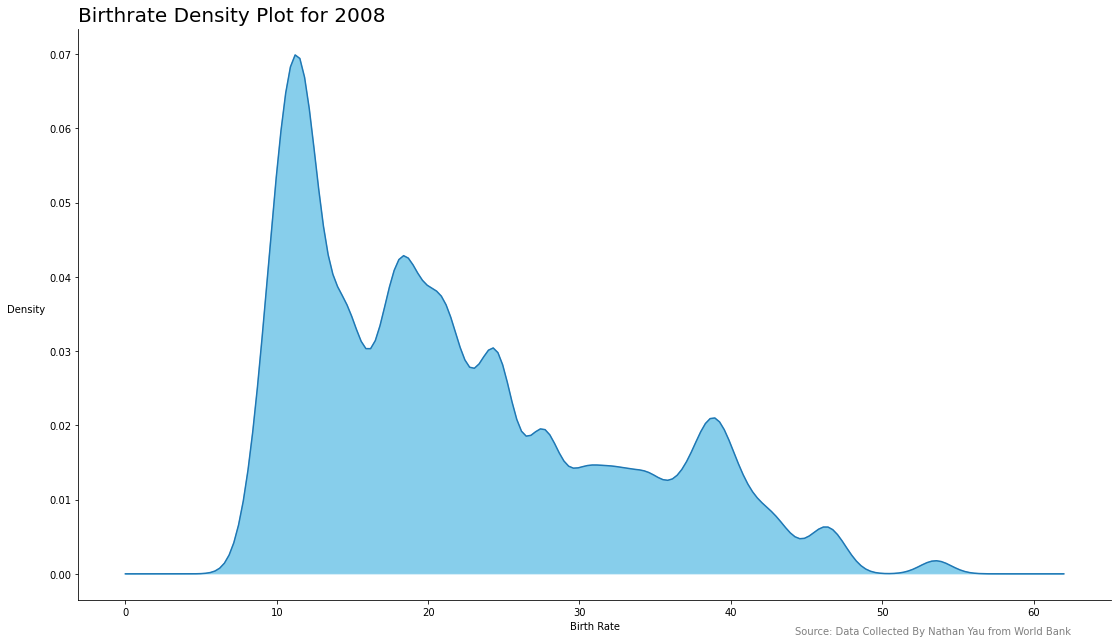

In [11]:
# Create axes and figure
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Set figure size
fig.set_size_inches(18.5, 10.5)

# Add plot to figure
ax1.plot(xs,density(xs))
ax1.fill(xs, density(xs), color = 'skyblue')

        
# Set titles, caption and axis labels
fig.suptitle("Birthrate Density Plot for 2008", x = 0.24, y = 0.91, fontsize=20)
fig.text(.87, .08, 'Source: Data Collected By Nathan Yau from World Bank', ha = 'right', color = 'gray')
ax1.set_xlabel("Birth Rate")
ax1.set_ylabel("Density", rotation = 0, ha = 'right')

# Remove frame
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Show plot
plt.show

# save file
fig.savefig("python_density.png")